In [69]:
import csv

def read_sales_data(file_path):
    sales_data = []
    with open(file_path, 'r') as file:
        content = csv.reader(file)
        for row in content:
            product_name, quantity, price, date = row
            sales_data.append({'product_name': product_name,
                               'quantity': quantity,
                               'price': price,
                               'date': date})
    return sales_data

sales_data = read_sales_data("data.csv")
print(sales_data)

[{'product_name': 'яблоки            ', 'quantity': '10 ', 'price': '15 ', 'date': '2024-06-21'}, {'product_name': 'груши             ', 'quantity': '16 ', 'price': '11 ', 'date': '2024-06-22'}, {'product_name': 'сливы             ', 'quantity': '20 ', 'price': '15 ', 'date': '2024-06-19'}, {'product_name': 'печенье           ', 'quantity': '16 ', 'price': '23 ', 'date': '2024-06-20'}, {'product_name': 'сливы             ', 'quantity': '21 ', 'price': '15 ', 'date': '2024-06-16'}, {'product_name': 'яблоки            ', 'quantity': '16 ', 'price': '15 ', 'date': '2024-06-20'}, {'product_name': 'конфеты Рот-Фронт ', 'quantity': '11 ', 'price': '22 ', 'date': '2024-06-24'}, {'product_name': 'сливы             ', 'quantity': ' 6 ', 'price': '15 ', 'date': '2024-06-20'}]


In [70]:
def total_sales_per_product(sales_data):
    sales_per_product = {}
    for sale in sales_data:
        product = sale['product_name']
        total_price = int(sale['quantity']) * int(sale['price'])
        if product in sales_per_product:
            sales_per_product[product] += total_price
        else:
            sales_per_product[product] = total_price
    return sales_per_product

sales_per_product = total_sales_per_product(sales_data)

print(sorted(sales_per_product.items(), key=(lambda x: x[1])))
print(max(sales_per_product.items(), key=(lambda x: x[1])))

[('груши             ', 176), ('конфеты Рот-Фронт ', 242), ('печенье           ', 368), ('яблоки            ', 390), ('сливы             ', 705)]
('сливы             ', 705)


In [71]:
def sales_over_time(sales_data):
    sales_per_day = {}
    for sale in sales_data:
        date = sale['date']
        total_price = int(sale['quantity']) * int(sale['price'])
        if date in sales_per_day:
            sales_per_day[date] += total_price
        else:
            sales_per_day[date] = total_price
    return sales_per_day

sales_over_time = sales_over_time(sales_data)

print(sorted(sales_over_time.items(), key=(lambda x: x[1])))
print(max(sales_over_time.items(), key=(lambda x: x[1])))


[('2024-06-21', 150), ('2024-06-22', 176), ('2024-06-24', 242), ('2024-06-19', 300), ('2024-06-16', 315), ('2024-06-20', 698)]
('2024-06-20', 698)


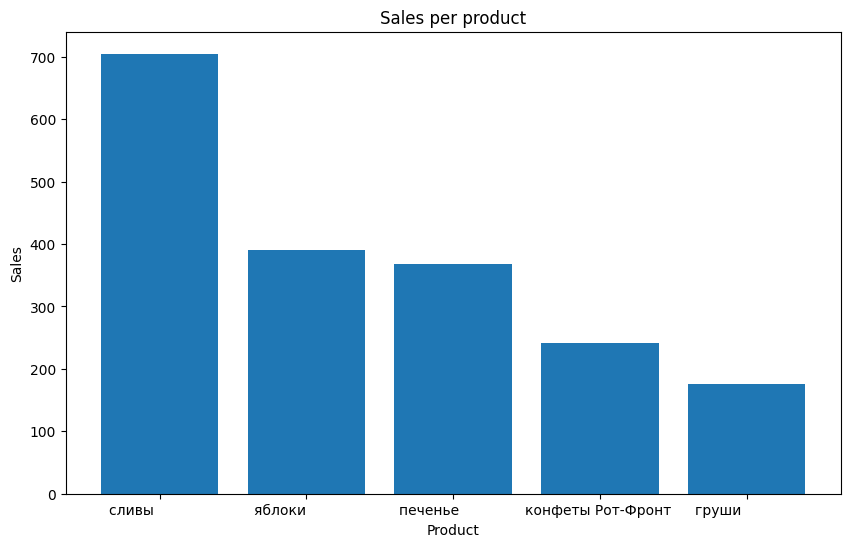

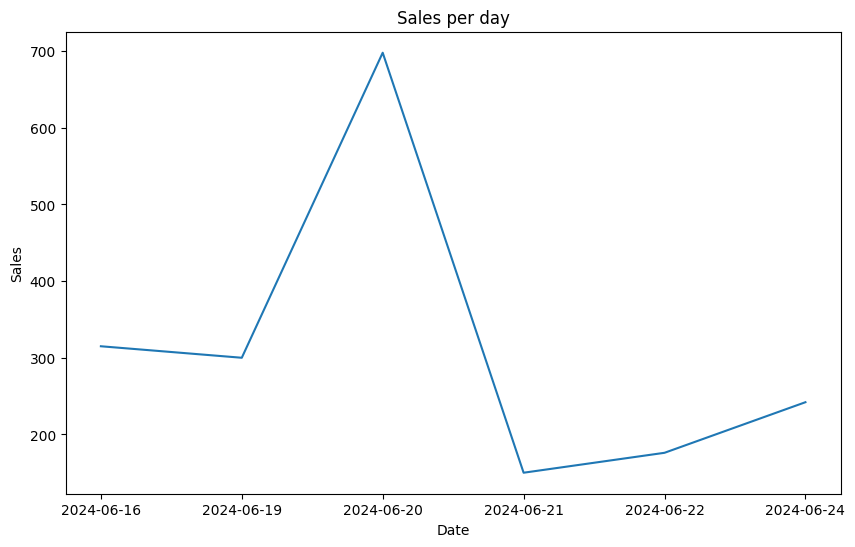

In [72]:
import matplotlib.pyplot as plt

def plot_sales_per_product(sales_per_product: dict):
    sales_per_product = dict(sorted(sales_per_product.items(), key=(lambda x: x[1]), reverse=True))
    products = sales_per_product.keys()
    sales = sales_per_product.values()
    
    plt.figure(figsize=(10, 6))
    plt.bar(products, sales)
    plt.title('Sales per product')
    plt.xlabel('Product')
    plt.ylabel('Sales')
    plt.show()

def plot_sales_per_day(sales_over_time: dict):
    sales_over_time = dict(sorted(sales_over_time.items(), key=(lambda x: x[0])))
    dates = sales_over_time.keys()
    sales = sales_over_time.values()
    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales)
    plt.title('Sales per day')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

plot_sales_per_product(sales_per_product)
plot_sales_per_day(sales_over_time)